In [1]:
import imutils 
import cv2 as cv
import numpy as np
import argparse
import cv2.aruco as aruco
from PIL import Image, ImageDraw, ImageColor
import matplotlib.pyplot as plt
import math


In [2]:
def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name, cmap='gray')
    plt.title(Title)
    plt.axis('off')

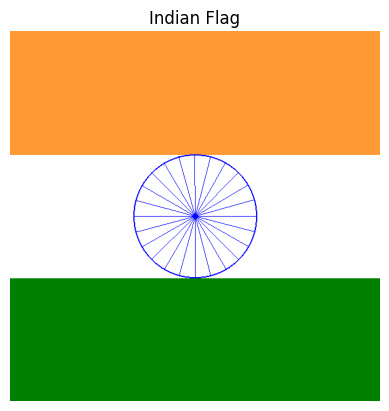

In [3]:
#Creating Indian Flag
# Global variable to store the generated flag
indian_flag = None

def generate():
    global indian_flag

    # Creating a 600x600 white background
    indian_flag = Image.new('RGB', (600, 600), 'white')
    draw = ImageDraw.Draw(indian_flag)

    # Drawing the green rectangle (bottom part of the flag)
    draw.rectangle([(0, 400), (600, 600)], fill='green')

    # Drawing the white rectangle (middle part of the flag)
    draw.rectangle([(0, 200), (600, 400)], fill='white')

    # Drawing the saffron rectangle (top part of the flag)
    draw.rectangle([(0, 0), (600, 200)], fill='#FF9933')

    # Drawing the blue circle (chakra) at the center
    draw.ellipse([(200, 200), (400, 400)], outline='blue', width=2)

    # Drawing the 24 spokes on the wheel
    for i in range(24):
        angle = i * (360 / 24)  # Angle between each spoke
        x1 = 300
        y1 = 300 
        x2 = 300 + 100 * math.cos(2 * 3.14 * angle / 360)  # x-coordinate of spoke end
        y2 = 300 + 100 * math.sin(2 * 3.14 * angle / 360)  # y-coordinate of spoke end
        draw.line([(x1, y1), (x2, y2)], fill='blue', width=1)

    # Display the generated flag
    # indian_flag.show()
   

# Call the generate function to create and display the Indian flag
generate()
show(indian_flag, 1, 1, 1, 'Indian Flag')


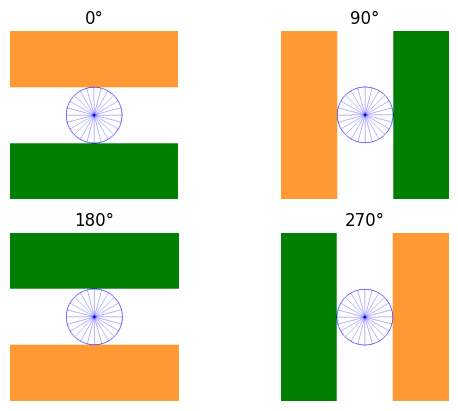

In [4]:
#Image roatation
# Global variables to store rotated flags
rotated_flag_0 = None
rotated_flag_90 = None
rotated_flag_180 = None
rotated_flag_270 = None

def rotate(img, angle):
    # Rotate the given image at an angle (in degrees) in the counter-clockwise direction
    return img.rotate(angle, resample=Image.BICUBIC, expand=True)


def rotatedFlags():
    global rotated_flag_0, rotated_flag_90, rotated_flag_180, rotated_flag_270

    # Generate the original flag
    generate()

    # Rotate the flag at different angles
    rotated_flag_0 = indian_flag.copy()
    rotated_flag_90 = rotate(indian_flag, 90)
    rotated_flag_180 = rotate(indian_flag, 180)
    rotated_flag_270 = rotate(indian_flag, 270)

# Call the function to generate and rotate the flags
rotatedFlags()

# Display the rotated flags
show(rotated_flag_0,2,2,1,"0°")
show(rotated_flag_90,2,2,2,"90°")
show(rotated_flag_180,2,2,3,"180°")
show(rotated_flag_270,2,2,4,"270°")


pixel: [(255, 255, 255), (254, 254, 254), (254, 254, 253), (255, 255, 253), (255, 255, 251), (253, 253, 255), (231, 233, 255), (128, 132, 215), (33, 35, 162), (84, 83, 197), (218, 213, 249), (252, 244, 255), (240, 232, 252), (227, 224, 249), (229, 230, 255), (189, 194, 223), (146, 149, 190), (129, 128, 179), (134, 130, 184), (146, 139, 193), (183, 176, 233), (204, 199, 249), (213, 210, 251), (221, 219, 251), (238, 234, 251), (245, 243, 252), (245, 244, 252), (247, 246, 253), (251, 250, 254), (254, 254, 255), (254, 255, 255), (251, 252, 250), (249, 251, 246), (254, 255, 251), (251, 253, 251), (252, 253, 253), (253, 254, 255), (255, 255, 254), (255, 255, 252), (252, 254, 249), (253, 254, 249), (254, 255, 250), (253, 255, 250), (254, 255, 254), (252, 253, 255), (251, 252, 255), (252, 254, 255), (231, 231, 248), (189, 189, 214), (157, 156, 187), (155, 150, 193), (181, 174, 227), (220, 214, 252), (249, 246, 252), (249, 249, 254), (251, 254, 255), (253, 255, 254), (251, 255, 253), (250, 254,

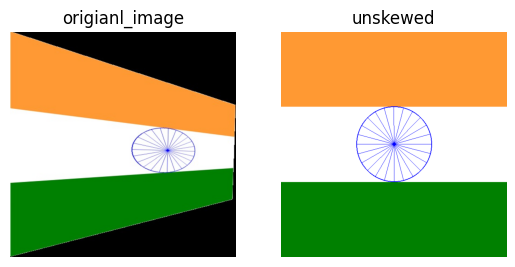

In [5]:

horizontal = "horizontal"
vertical = "vertical"

# Load the original flag image
def get_code(org_image, orientation, a):
    colors = []
    for i in range(600):
        if orientation == horizontal:
            pixel_color = org_image.getpixel((i,299))
        elif orientation == vertical:
            pixel_color = org_image.getpixel((299,i))
            
        if pixel_color not in [(0, 0, 255), (0, 0, 0)] and pixel_color not in colors:
            colors.append(pixel_color)

    sum_rgb = [sum(color) for color in colors]

    code = []
    for i in sum_rgb:
        if 440<= i <= 470 and 'O' not in code:
            code.append('O')
        elif 740 <= i <= 765 and 'W' not in code:
            code.append('W')
        elif 120 <= i <= 140 and 'G' not in code:
            code.append('G')

    if a:
        print("pixel:", colors)
        print("sum_rgb: ", sum_rgb)
        
        print("horizontal code: ", ''.join(code))
    else:
        print("vertical code: ", ''.join(code))

    return code

def unskew_flag(original_image):
    # Initialize an empty array to store distinct color
    horizontal_code = get_code(original_image, horizontal, 1)
    vertical_code = get_code(original_image, vertical, 0)

    if len(horizontal_code)==3:
        if horizontal_code[0]=='O' :
            return rotate(indian_flag,90)
        else:
            return rotate(indian_flag,270)
    elif len(vertical_code)==3:
        if vertical_code[0]=='O':
            return indian_flag
        else:
            return rotate(indian_flag,180)

# Display the original and reference flags for comparison
image_path = 'PHOTO-2023-12-25-21-19-32 2.jpg'
original_flag = Image.open(image_path)  # Replace with the actual path
original_flag = original_flag.resize((600, 600))  # Resize to (600, 600) to fit the screen
show(unskew_flag(original_flag),1,2,2,"unskewed")
show(original_flag,1,2,1,"origianl_image")

